In [ ]:
# 07 데이터 정제 

In [2]:
# 07-1 빠진 데이터, 이상한 데이터 제거하기
# 결측치(missing value) - 누락된 값, 비어있는 값
import pandas as pd
import numpy as np

In [3]:
# 결측치 찾기

In [4]:
# 결측지가 포함된 DF 만들기
df = pd.DataFrame({'sex'    : ['M', 'F', np.nan, 'M', 'F'],
                   'score'  : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [5]:
pd.isna(df) # 결측지 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
# isna()와 sum()을 조합하면 결측치 개수를 확인할 수 있음
pd.isna(df).sum() # 결측치 빈도 확인

sex      1
score    1
dtype: int64

In [7]:
df.dropna(subset = 'score') # score 결측지 제거
# score가 결측지가 아닌 행만 출력

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df_nomiss2 = df.dropna() # 모든 변수에 결측치 없는 데이터 추출 > 아무 변수도 입력 안 할 시
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
# 결측치 제거하지 않고 분석하기
# pd.sum(), pd.mean()과 같은 수치 연산 함수는 결측치가 있으면 자동으로 제거하고 연산하는 기능이 있음
# groupby()와 agg()를 이용해 집단별 요약 통계량을 구할 때도 마찬가지임

In [10]:
# 결측치 대체(imputation)하기 > 결측치를 다른 값으로 대체하는 것
# 1. 평균값이나 최빈값 같은 대표값을 구해 모든 결측치를 하나의 값으로 일괄 대체
# 2. 통계 분석 기법으로 결측치의 예측값을 추정해 대체

In [11]:
# df.loc[]는 데이터의 위치를 지칭하는 역할을 함. [행,열]
exam = pd.read_csv('exam.csv') # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14행의 mathdp NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [12]:
# 평균값으로 결측치 대체
exam['math'].mean()

55.23529411764706

In [13]:
exam['math'] = exam['math'].fillna(55) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [14]:
# 혼자서 해보기

# 결측치 만들기
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64, 123, 130, 152, 211], "hwy"] = np.nan

In [15]:
# Q1
pd.isna(mpg[['drv', 'hwy']]).sum() # drv와 hwy에 결측치 확인

drv    0
hwy    5
dtype: int64

In [16]:
# Q2
mpg.dropna(subset = 'hwy') \
   .groupby('drv') \
   .agg(hwy_mean = ('hwy', 'mean'))

,hwy_mean
drv,
4,19.242424
f,28.200000
r,21.000000


In [17]:
# 07-2 이상한 데이터를 찾아라 - 이상치 정제하기
# 이상치(anomaly) : 정상 범위에서 크게 벗어난 값

In [18]:
# anomaly가 포함된 DF 만들기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [19]:
# 이상치 확인하기
# df.value_counts()를 이용해 빈도표를 만들어 확인
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [20]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [21]:
# 결측 처리하기
# where()를 이용해 이상치 > 결측치로 변환
# 주의 where()를 이용하여 문자들중 np.nan을 이용하여 결측치로 변환을 할 수 없음 > 문자 nan으로 변환함.
# > df.replace()를 이용해 결측치로 만들 문자를 np.nan으로 바꿀 수 있음

# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [22]:
# 결측치로 변환된 이상치 제거하기
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [23]:
# 극단치(outlier) : 논리적으로 존재할 순 있지만 극단적으로 크거나 작은 값

<Axes: ylabel='hwy'>

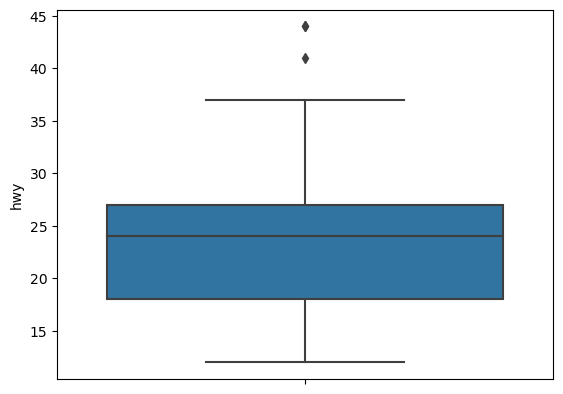

In [24]:
# 상자 그림(box plot)으로 극단치 기준 정하기 (p191)
mpg = pd.read_csv('mpg.csv') # mpg 데이터 불러오기
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [25]:
# 극단치 기준값 구하기
# (1) 1사분위수, 3사분위수 구하기
# df.quantile()을 이용하면 분위수(quantile)을 구할 수 있음
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [26]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [27]:
# (2) IQR(inter quartile range) 구하기
iqr = pct75 - pct25
iqr

9.0

In [28]:
# (3) 하한, 상한 구하기
pct25 - 1.5 * iqr # 하한

4.5

In [29]:
pct75 + 1.5 * iqr # 상한

40.5

In [30]:
# 3. 극단치 결측 처리하기

# 4.5 - 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), 
                      np.nan, mpg['hwy'])
# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [77]:
# 4. 결측치 제거하고 분석하기
# drv에 따라 hwy평균이 어떻게 다른지 확인

# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.050000
f,28.160377
r,20.791667


In [89]:
# 혼자서 해보기

# 이상치 할당
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [90]:
# Q1
# 이상치 확인하기
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [91]:
# 결측 처리
mpg['drv'] = np.where(mpg['drv'] \
               .isin(['4', 'f', 'r']), mpg['drv'], np.nan)

<Axes: ylabel='cty'>

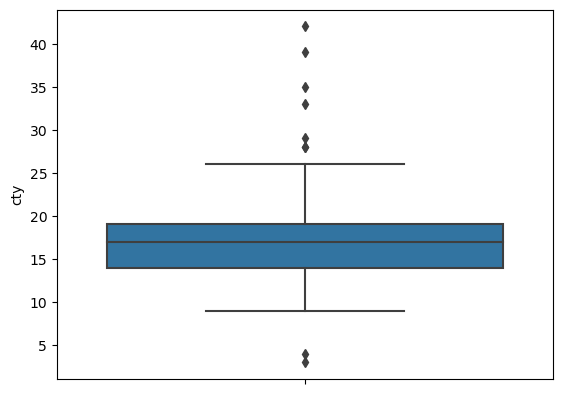

In [92]:
# Q2
import seaborn as sns # seaborn package load
sns.boxplot(data = mpg, y = 'cty')

In [93]:
pct25 = mpg['cty'].quantile(.25) # 1사분위수 
pct75 = mpg['cty'].quantile(.75) # 3사분위수
iqr = pct75 - pct25 # inter quartile range 

In [94]:
iqr

5.0

In [95]:
pct25 - 1.5 * iqr

6.5

In [96]:
pct75 + 1.5 * iqr

26.5

<Axes: ylabel='cty'>

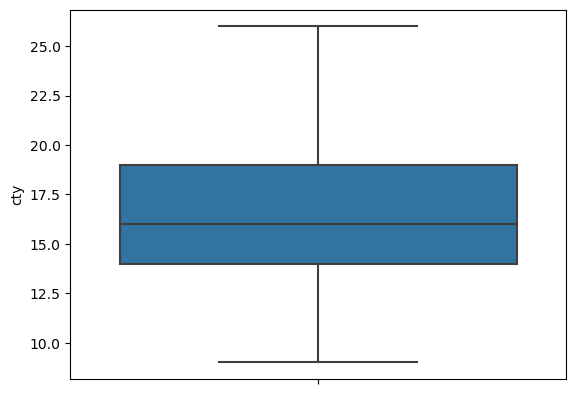

In [114]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                       np.nan, mpg['cty'])
sns.boxplot(data = mpg, y = 'cty')

In [113]:
# Q3
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
